# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename) 
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [3]:
list(df.columns)

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'cal

In [4]:
print("Columns: ", df.shape[1], "Rows: ", df.shape[0])

Columns:  50 Rows:  28022


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<b>Dataset:</b> AirBnB Dataset

<b>Problem Type:</b> Supervised, Regression Problem predicting the Host_Review_Score_Rating (label)

<b>Features:</b> Host_is_superhost, host_response_rate

<b>Importance:</b> Companies can reach out to host's with a predicted lower rating to provide better support, increasing user engagement metrics for the user.

Predicting the review score of a host's Airbnb could serve a few purposes for a real estate company:
<ul>
    <li>low predicted scores can prompt company to investigate situation about host</li>
    <ul></ul>
    <li>high predicted scores can prompt company to seek advertisement opportunity with host</li>
</ul>

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

## Data Preparation Plan

<b>Initial Plan:</b>
1. Replacing missing values with means
2. Transforming string/binary data into numerical data
3. Transforming label data into a simple data type (i.e float)
4. Removal of low correlation labels (after analysis on whether said labels have an impact on the data)
5. Re-evaluation of chosen features for bias 

This is are a few ideas that come to mind when it comes to this data set. <br> 
Catergorical features that would need one-hot encoding like room_type are likely 
irrelevant features <br> that will be removed from the dataset after the 
exploratory data analysis (EDA) phase.

Evaluation metrics for this regression problem would be looking at the <br>
Random Mean Squared Error and the $R^2$ values of the models.

## Exploratory Data Analysis (EDA) 

In the code cells below, the dataset will be analyzed for correlation between the label and features.

In [5]:
# Getting insight on the label; the label is an ordinal number
df['review_scores_rating'].describe()

count    28022.000000
mean         4.683482
std          0.505857
min          0.000000
25%          4.600000
50%          4.830000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

In [6]:
# Gathering data types of the dataset
col_obj = list(df.select_dtypes(include=['object']).columns)
col_float = list(df.select_dtypes(include=['float']).columns)
col_bool = list(df.select_dtypes(include=['bool']).columns)

col_obj

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'neighbourhood_group_cleansed',
 'room_type',
 'amenities']

In [7]:
col_float

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [8]:
col_bool

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'instant_bookable']

<b>Notes about data from code cell below:</b>

Spearman is used since the regression label is ordinal

host_is_superhost is NaN since it is a boolean value
- boolean values should be transformed into binary 0 and 1s in data prep to analyze their affect on the correlation

host_response rate has little effect on score <br>
while other review scores do have an effect

review score value feature is vague... but has to do with
users getting their money's worth for the AirBnB (potential bias?)

In [9]:
# Examining feature correlation with the label
df.corr(method = 'spearman')['review_scores_rating'].sort_values(ascending=False)

review_scores_rating                            1.000000
review_scores_value                             0.692914
review_scores_cleanliness                       0.671367
review_scores_communication                     0.603329
review_scores_checkin                           0.568603
review_scores_location                          0.460670
host_response_rate                              0.126367
price                                           0.092826
minimum_minimum_nights                          0.040564
minimum_nights                                  0.037679
minimum_nights_avg_ntm                          0.036654
calculated_host_listings_count_entire_homes     0.033853
maximum_minimum_nights                          0.031668
n_host_verifications                            0.024166
bedrooms                                        0.014501
bathrooms                                       0.010585
has_availability                               -0.005849
number_of_reviews_l30d         

In [10]:
# Double checking features with the pearson method 
df.corr()['review_scores_rating'].sort_values(ascending=False)

review_scores_rating                            1.000000
review_scores_value                             0.820631
review_scores_cleanliness                       0.758213
review_scores_communication                     0.727749
review_scores_checkin                           0.688152
review_scores_location                          0.574464
host_response_rate                              0.121477
number_of_reviews_l30d                          0.067435
number_of_reviews                               0.067182
n_host_verifications                            0.050888
number_of_reviews_ltm                           0.045595
price                                           0.045067
reviews_per_month                               0.039317
has_availability                                0.030396
host_acceptance_rate                            0.012542
bedrooms                                        0.011528
accommodates                                    0.007798
beds                           

In [11]:
nan_count = np.sum(df.isnull(), axis = 0)


nan_detected = df.columns[nan_count != 0]
nan_detected
for col in nan_detected:
    print("NaN values of", col, ":", nan_count[col]) # to be averaged or taken out

NaN values of name : 5
NaN values of description : 570
NaN values of neighborhood_overview : 9816
NaN values of host_location : 60
NaN values of host_about : 10945
NaN values of host_response_rate : 11843
NaN values of host_acceptance_rate : 11113
NaN values of bedrooms : 2918
NaN values of beds : 1354


In [12]:
df['host_response_rate'].describe()

count    16179.000000
mean         0.906901
std          0.227282
min          0.000000
25%          0.940000
50%          1.000000
75%          1.000000
max          1.000000
Name: host_response_rate, dtype: float64

In [13]:
df['host_is_superhost'].unique()

array([ True])

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

## Data Preparation

<b>Post EDA Plan:</b>
1. Replacing missing values with means
2. Transforming string/binary data into numerical data
3. Removal of low correlation labels (ex: availablity, minimum nights)
4. Re-evaluation of chosen features for bias 

Chosen features: review_scores_X, host_response_rate, price <br>
Potential feature removal: review_scores_value & review_scores_location

review_scores_value & review_scores_location have potential for bias 
- review_score_value is vague on the AirBnB website, which can create <br> 
  reviews that are more subjective (i.e what does a reviewer interpret value to mean)
- Disruptive noise in the area or high volume traffic leading to area are <br> factors that
can lead to poor review scores which the owner of the AirBnB has no control over


## Modeling, Training and Metrics

After conducting EDA, appropriate models to explore this supervised, regression problem are:
1. Linear Regression
2. Decision Tree
3. Random Forrest

<b>Training Plan:</b>
Split the Data into 20/20/60 split
- 60% allocated for training
- 20% allocated for validation
- 20% allocated for testing 

Good/Satisfactory Accuracy: 80 to 70% range <br>
Concerning Accuracy: 100 to 90% range, below 70% <br>
1. <b> 100 to 90% Range:</b>
   - Check for overfitting
   - Adjust hyperparameters
2. <b> Below 70% range:</b>
   - Check for underfitting

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [14]:
# YOUR CODE HERE
import scipy.stats as stats # helps handles outliers in data

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

## Feature Engineering

First step: Data Transformation

This step will turn features into more reasonable data types for the problem.

Example: turning the boolean 'host_is_superhost' feature into a numeric feature


In [15]:
for col in col_bool:
    df[col] = df[col].replace({True: 1, False: 0})

df[col_bool]

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,1,1,1,1,0
1,1,1,1,1,0
2,1,1,1,1,0
3,1,1,1,1,0
4,1,1,1,1,0
...,...,...,...,...,...
28017,1,1,1,1,1
28018,1,1,1,1,0
28019,1,1,1,1,1
28020,1,1,1,1,0


In [16]:
# Handling outliers in price data
df['price-w'] = stats.mstats.winsorize(df['price'], limits=[0.01,0.01])

Second Step: Addressing Missing Values

This step handles NaN values found in the feature columns.

For example, 'host_response_rate' is missing around a 1000 values.

Since this will be a relevant feature, it will need to be
filled with the mean value.

In [17]:
nan_detected

Index(['name', 'description', 'neighborhood_overview', 'host_location',
       'host_about', 'host_response_rate', 'host_acceptance_rate', 'bedrooms',
       'beds'],
      dtype='object')

In [18]:
# Filling the NaN values of host_response_rate with the mean
df['host_response_rate'].fillna(value= round(df['host_response_rate'].mean(), 2), inplace= True)

Third Step: Removing Irrelevant Features

This step removes low correlation features from the dataset.
This helps with improving model performance and the run time of 
this notebook. 

In [19]:
# Removing strings
df.drop(columns=col_obj, inplace=True)

In [20]:
df.corr(method= 'spearman')['review_scores_rating'].sort_values(ascending=False)

review_scores_rating                            1.000000
review_scores_value                             0.692914
review_scores_cleanliness                       0.671367
review_scores_communication                     0.603329
review_scores_checkin                           0.568603
review_scores_location                          0.460670
price                                           0.092826
price-w                                         0.092816
minimum_minimum_nights                          0.040564
minimum_nights                                  0.037679
host_response_rate                              0.037414
minimum_nights_avg_ntm                          0.036654
calculated_host_listings_count_entire_homes     0.033853
maximum_minimum_nights                          0.031668
n_host_verifications                            0.024166
bedrooms                                        0.014501
bathrooms                                       0.010585
has_availability               

In [21]:
df_corr = df[['review_scores_rating', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_communication','review_scores_checkin', 'review_scores_location','host_response_rate','price-w']].copy()

In [22]:
df_corr

,review_scores_rating,review_scores_value,review_scores_cleanliness,review_scores_communication,review_scores_checkin,review_scores_location,host_response_rate,price-w
0,4.70,4.41,4.62,4.79,4.76,4.86,0.80,150.0
1,4.45,4.64,4.49,4.80,4.78,4.71,0.09,75.0
2,5.00,5.00,5.00,5.00,5.00,4.50,1.00,275.0
3,4.21,4.36,3.73,4.42,4.66,4.87,1.00,68.0
4,4.91,4.92,4.82,4.95,4.97,4.94,0.91,75.0
...,...,...,...,...,...,...,...,...
28017,5.00,1.00,5.00,5.00,5.00,3.00,1.00,89.0
28018,5.00,5.00,5.00,5.00,5.00,5.00,0.91,899.0
28019,1.00,2.00,1.00,5.00,1.00,5.00,0.99,64.0
28020,5.00,5.00,5.00,5.00,5.00,5.00,0.90,84.0


Final Step: Quick Analysis Check

Shown below is graph of the features correlation with the given label. 

This step is to ensure that the features picked will contribute to the model
and an opportunity to any final adjustments.

Text(0.5, 1.0, 'Feature Importance using Spearman Correlation Matrix Heatmap')

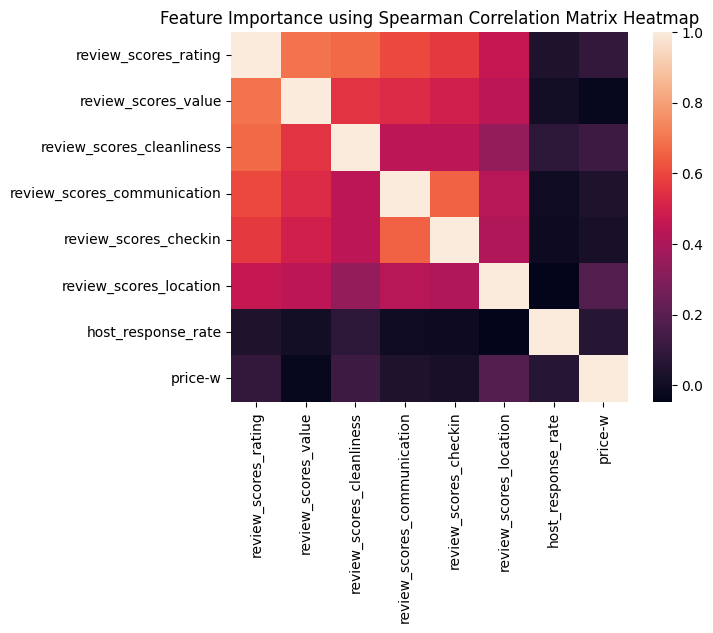

In [23]:
# Plotting correlation on a heatmap
plt.figure()
sns.heatmap(df_corr.corr(method='spearman'))
plt.title('Feature Importance using Spearman Correlation Matrix Heatmap')

Text(0.5, 1.0, 'Feature Importance using Pearson Correlation Matrix Heatmap')

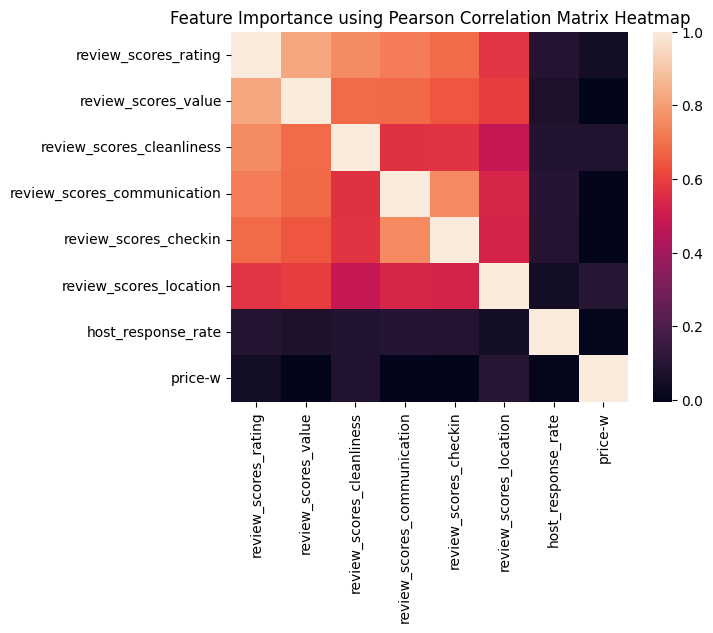

In [24]:
# Plotting correlation on a heatmap
plt.figure()
sns.heatmap(df_corr.corr())
plt.title('Feature Importance using Pearson Correlation Matrix Heatmap')

## Modeling

This is where the modeling magic begins.

But first, the let's create our label and features.

In [25]:
# Creating the label and feature
y = df_corr['review_scores_rating'] # the label
X = df_corr.drop(columns='review_scores_rating', axis = 1) # the features

Next is splitting the data. The data is split 60/20/20; validation is used for testing.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234) # 20% test data, 80% train + val data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1234) # 0.25 x 0.80 = 20% of val data, 60% training data

Below code cells verify that split was done correctly

In [27]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(16812, 7)
(5605, 7)
(5605, 7)
(16812,)
(5605,)
(5605,)


In [28]:
y_val.head()

6581     4.74
18462    4.72
19351    4.75
26342    5.00
7562     5.00
Name: review_scores_rating, dtype: float64

In [29]:
y_test.head()

17758    4.85
19492    5.00
12485    4.81
14553    4.80
13532    4.78
Name: review_scores_rating, dtype: float64

### Going Over Our Models

This section will be training, testing, and evaluating the following models:
1. Linear Regression
2. Decision Tree Regression
3. Random Forrest

Based on the Random Mean Squared Error (RMSE) and $R^2$ metrics used for
regression models.

<b>Quick Overview of RMSE and $R^2$:</b>
- RMSE is (averaged) difference between predicted and actual values; intuitively, this means <br> a low RMSE score indicates that actual and predicted are close!
- $R^2$ measures the variablity of the prediction, or how well the model responds to the data; <br> high score indicates model is adapting well

<b>Side Note:</b> This notebook will be updated to compare other regression models <br>
unfortunately, I'm on a time crunch. 

### Train, Test, Evaluate Linear Regression Model

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Using the fitted model to make predictions on the validation data
y_lr_pred = lr_model.predict(X_val)

# Computing the RMSE  and R2 
lr_rmse = mean_squared_error(y_val, y_lr_pred, squared = False)

lr_r2 = r2_score(y_val, y_lr_pred)

print('[LR] Root Mean Squared Error (RMSE): {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error (RMSE): 0.25145035589561326
[LR] R2: 0.7440832715713495


In [32]:
# Furher insight on the Linear Regression Model
print('Model Summary:\n')

# Print intercept (alpha)
print('Intercept:')
print('alpha = ' , lr_model.intercept_)

# Print weights
print('\nWeights:')
i = 0
features = list(X.columns)
for w in lr_model.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', features[i],']')
    i += 1

Model Summary:

Intercept:
alpha =  -0.17000072416030587

Weights:
w_ 1 =  0.4120219844970947  [ weight of  review_scores_value ]
w_ 2 =  0.25929541999034045  [ weight of  review_scores_cleanliness ]
w_ 3 =  0.2110768964773289  [ weight of  review_scores_communication ]
w_ 4 =  0.11541523523203083  [ weight of  review_scores_checkin ]
w_ 5 =  0.029195312513618038  [ weight of  review_scores_location ]
w_ 6 =  0.020566477270947514  [ weight of  host_response_rate ]
w_ 7 =  8.653032837491871e-05  [ weight of  price-w ]


### Train, Test, Evaluate Decision Tree Model

Setting up a parameter grid to find the optimal parameters

In [33]:
param_grid = {
    'max_depth': [4, 8, 16, 32],
    'min_samples_leaf': [25, 50, 75, 100]
}
param_grid

{'max_depth': [4, 8, 16, 32], 'min_samples_leaf': [25, 50, 75, 100]}

In [34]:
print('Running Grid Search...')

# Creating a DecisionTreeRegressor model obj 
dt_regressor = DecisionTreeRegressor()

# Running a Grid Search with 3-fold cross-validation
dt_grid = GridSearchCV(dt_regressor, param_grid, cv = 3, scoring='neg_root_mean_squared_error')

# Fitting the model on the training data 
dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...


Done


In [35]:
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

dt_best_params = {
    'max_depth': dt_grid_search.best_params_['max_depth'],
    'min_samples_leaf': dt_grid_search.best_params_['min_samples_leaf']
}

print(dt_best_params)

[DT] RMSE for the best model is : 0.24
{'max_depth': 16, 'min_samples_leaf': 25}


In [36]:
dt_model = DecisionTreeRegressor(max_depth = dt_best_params['max_depth'], min_samples_leaf = dt_best_params['min_samples_leaf'])
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=25)

In [37]:
# Using the fitted model to make predictions on the validation data
y_dt_pred = dt_model.predict(X_val)


# Computing the RMSE and R2 
dt_rmse = mean_squared_error(y_val, y_dt_pred, squared = False)

dt_r2 = r2_score(y_val, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.2598396925074832
[DT] R2: 0.7267216963611867


### Train, Test, Evaluate Random Forrest Model

Performing Grid Search to find optimal paramaters; 

Code cell below is commented out since this step takes longer 
than a minute to run. <br> To save my burning laptop, a depth of 32 and n_estimators of 300 was chosen.

In [38]:
# param_grid2 = {
#     'max_depth': [16, 32, 64],
#     'n_estimators': [100, 200, 300]
# }

# print('Running Grid Search...')

# # Creating a DecisionTreeRegressor model object 
# rf_regressor = RandomForestRegressor()

# # Running a Grid Search with 3-fold cross-validation
# rf_grid = GridSearchCV(rf_regressor, param_grid2, cv = 3, scoring='neg_root_mean_squared_error')

# # Fitting the model on the training data 
# rf_grid_search = rf_grid.fit(X_train, y_train)

# print('Done')

After finding the best parameters using gridsearch

In [39]:
print('Begin RF Implementation...')

rf_model = RandomForestRegressor(max_depth = 32, n_estimators = 300)
rf_model.fit(X_train, y_train)

print('End')

Begin RF Implementation...
End


In [40]:
# Using the fitted model to make predictions on the validation data
y_rf_pred = rf_model.predict(X_val)


# Computing the RMSE and R2 score
rf_rmse = mean_squared_error(y_val, y_rf_pred, squared = False)

rf_r2 = r2_score(y_val, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))      

[RF] Root Mean Squared Error: 0.25122968921725236
[RF] R2: 0.7445322469951189


## Comparing Model Performance with Visualization

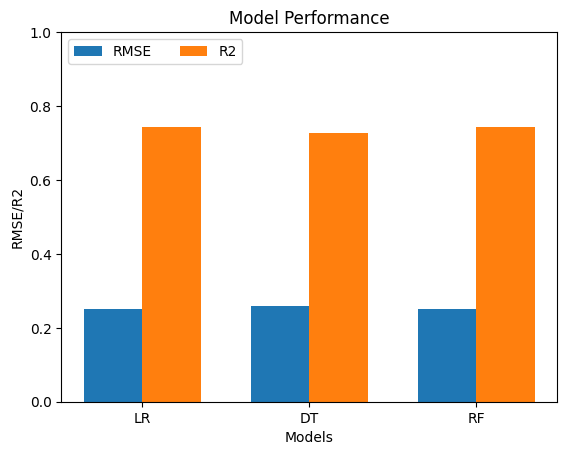

In [41]:
RMSE_Results = [lr_rmse, dt_rmse, rf_rmse]
R2_Results = [lr_r2, dt_r2, rf_r2]

rg= np.arange(3)
width = 0.35

# Creating bar plot with RMSE and R2 results
plt.bar(rg, RMSE_Results, width, label='RMSE')

plt.bar(rg + width, R2_Results, width, label='R2')


labels = ['LR', 'DT', 'RF']
plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE/R2")


plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

### Did Feature Engineering Make a Difference?

As shown above, these models all have similar performances. 

To check see if feature tuning had an impact, a linear regression model will be trained <br>
below on the original, modified dataFrame.

In [42]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,price-w
0,0.80,0.17,1,8.0,8.0,1,1,1,1.0,NaN,...,4.86,4.41,0,3,3,0,0,0.33,9,150.0
1,0.09,0.69,1,1.0,1.0,1,1,3,1.0,1.0,...,4.71,4.64,0,1,1,0,0,4.86,6,75.0
2,1.00,0.25,1,1.0,1.0,1,1,4,1.5,2.0,...,4.50,5.00,0,1,1,0,0,0.02,3,275.0
3,1.00,1.00,1,1.0,1.0,1,1,2,1.0,1.0,...,4.87,4.36,0,1,0,1,0,3.68,4,68.0
4,0.91,NaN,1,1.0,1.0,1,1,1,1.0,1.0,...,4.94,4.92,0,1,0,1,0,0.87,7,75.0


In [44]:
## More data cleanup for whole dataset
nan_count = np.sum(df.isnull(), axis = 0)


nan_detected = df.columns[nan_count != 0]
nan_detected
for col in nan_detected:
    print("NaN values of", col, ":", nan_count[col]) # to be averaged or taken out
    # Filling the NaN values of host_response_rate with the mean
    df[col].fillna(value= round(df[col].mean(), 2), inplace= True)

NaN values of host_acceptance_rate : 11113
NaN values of bedrooms : 2918
NaN values of beds : 1354


[LR] Root Mean Squared Error (RMSE): 0.25145035589561326
[LR] R2: 0.7440832715713495


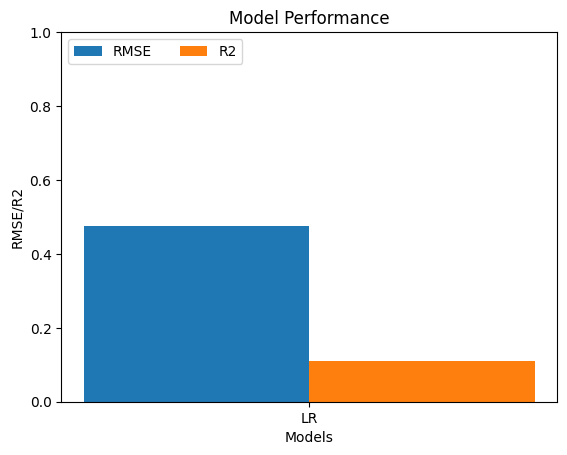

In [46]:
# Creating the label and feature
label_y = df['review_scores_rating'] # the label
feature_X = df.drop(columns='review_scores_rating', axis = 1) # the features

# Splitting the data 60/40 
X_train2, X_test2, y_train2, y_test2 = train_test_split(feature_X, label_y, test_size = 0.40, random_state = 1234)

# Creating the Linear Regression Model
lr_model2 = LinearRegression()
lr_model2.fit(X_train2, y_train2)

# Training the Model
y_lr_pred2 = lr_model2.predict(X_test2)

lr_rmse2 = mean_squared_error(y_test2, y_lr_pred2, squared = False)

lr_r22 = r2_score(y_test2, y_lr_pred2)

print('[LR] Root Mean Squared Error (RMSE): {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

# Plotting results
RMSE_Results = [lr_rmse2]
R2_Results = [lr_r22]

rg= np.arange(1)
width = 0.35

# 1. Create bar plot with RMSE and R2 results
plt.bar(rg, RMSE_Results, width, label='RMSE')

plt.bar(rg + width, R2_Results, width, label='R2')


labels = ['LR']
plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE/R2")


plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

As seen above, the RMSE and $R^2$ scores are flipped for the Linear Regression model.

Picking the right features for the model can certainly enhance model performance;
<br> assuming this graph shown above was for a dataset picked for it's features...

Some further techniques that can be used to evaluate/enhance the performance of the models are:
  - Performing GridSearch Cross Validation on the Linear Regression model for the best hyperparameters
    - finding the best C or max_iteration for example
  - Performing GridSearch Cross Validatin on Random Forrest (or train multiple models if saving computation time is critical)

Somethimes the above may not be enough, so other models to explore for this problem
  - Stacking the models
  - GBDT models


## Final Thoughts

This Jupyter Notebook highlights the importance of feature engineering
in model performance, as seen by how the 3 models performed on the 
validation data. 

With that in mind, I would want to improve this Notebook in the following ways:
1. Take the time to explore the model performance of other regression models
2. Add more visualization of the data and results
3. Use trained model on other AirBnB datasets to improve performance


Saving the Linear Regression into a pickle file 

(Code cell may be modified if someone wishes to use the Random Forrest instead)

In [47]:
import pickle as pk

In [48]:
pickle_filename = "AirBnBLinRegModel.pkl"
pk.dump(lr_model, open(pickle_filename, 'wb')) # replace lr_model with preferred model

In [49]:
# Testing that pickle worked
persistent_model = pk.load(open(pickle_filename, 'rb'))
modelPrediction = persistent_model.predict(X_test)
print(modelPrediction)

[4.8332938  4.88370945 4.83007195 ... 4.52893495 4.35092224 4.93265102]
